In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression # explicit class import from module
from sklearn.linear_model import LogisticRegression # explicit class import from module
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsClassifier #we know where this object comes from
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm, metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc


from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore') # Code for stopping warnings (deprecation warning, etc.)
pd.set_option('display.max_columns', None) # Code for showin g all columns in the dateset, withoud '...' in between.

In [5]:
people = pd.read_csv("../raw_data/people_train.csv")
people.head()

,employee_id,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,business_travel_Non-Travel,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_field_Human Resources,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,job_role_Healthcare Representative,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Divorced,marital_status_Married,marital_status_Single
0,456,-0.500000,0,-0.340456,-0.166667,3,4,1,-0.972222,2,2,3,0.240007,-0.694698,-0.333333,0,-0.166667,3,3,3,0.111111,-1.0,3,0.833333,1.2,0.000000,-0.2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,485,-0.250000,1,-0.653846,-0.166667,3,4,1,-0.861111,3,1,3,-0.359003,-0.394561,-0.333333,1,-0.166667,3,2,0,-0.888889,-1.0,3,-0.666667,-0.6,-0.333333,-0.6,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1049,0.750000,0,-0.029915,1.416667,4,2,0,-0.805556,3,1,2,-0.482582,-0.461706,-0.333333,0,0.333333,3,1,0,-0.333333,0.0,3,0.166667,0.0,-0.333333,0.2,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1102,-0.666667,0,0.122507,0.666667,2,1,0,-0.416667,3,1,3,-0.477081,0.681382,-0.333333,0,0.333333,3,4,1,-0.555556,2.0,2,-0.166667,-0.2,0.333333,-0.2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,806,-0.500000,0,0.159544,-0.500000,3,4,0,-0.750000,1,1,3,-0.178951,0.834154,0.333333,0,1.166667,4,3,2,-0.222222,-1.0,3,-0.500000,-0.2,-0.333333,-0.2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [3]:
X = people.drop(columns = ['employee_id','attrition'])
y = people['attrition']

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 0)

In [5]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

In [6]:
from collections import Counter
print('before SMOTE :' , Counter(y_train))
print('after SMOTE :' , Counter(y_train_smote))

before SMOTE : Counter({0: 646, 1: 125})
after SMOTE : Counter({0: 646, 1: 646})


In [7]:
#sem smote
model = RandomForestClassifier(n_estimators=100)
sacc = cross_val_score(model, X_train, y_train, scoring='accuracy')
sf1 = cross_val_score(model, X_train, y_train, scoring='f1')
sre = cross_val_score(model, X_train, y_train, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.8573271889400921
f1:  0.24176576935197622
recall:  0.11199999999999999


# Random Forest Classifier

In [109]:
model = RandomForestClassifier(n_estimators=100)

In [110]:
model = RandomForestClassifier(n_estimators=115)
sacc = cross_val_score(model, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(model, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(model, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.9358534614348567
f1:  0.9327520048194243
recall:  0.9225044722719142


In [10]:
#testando treshold
model.fit(X_train_smote, y_train_smote)
threshold = 0.3
predicted_proba = model.predict_proba(X_val)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
accuracy = accuracy_score(y_val, predicted)
print(accuracy)
print(classification_report(y_val, predicted))

0.7131782945736435
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       216
           1       0.33      0.76      0.46        42

    accuracy                           0.71       258
   macro avg       0.64      0.73      0.63       258
weighted avg       0.84      0.71      0.75       258



In [11]:
y_predrandf = model.predict(X_val)

In [12]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = model.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    accuracy = accuracy_score(y_val, predicted)
    print(threshold, classification_report(y_val, predicted))

0.0               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.16      1.00      0.28        42

    accuracy                           0.16       258
   macro avg       0.08      0.50      0.14       258
weighted avg       0.03      0.16      0.05       258

0.01               precision    recall  f1-score   support

           0       1.00      0.01      0.02       216
           1       0.16      1.00      0.28        42

    accuracy                           0.17       258
   macro avg       0.58      0.50      0.15       258
weighted avg       0.86      0.17      0.06       258

0.02               precision    recall  f1-score   support

           0       1.00      0.01      0.02       216
           1       0.16      1.00      0.28        42

    accuracy                           0.17       258
   macro avg       0.58      0.50      0.15       258
weighted avg       0.86      0.17      0.06       258

0.03 

In [13]:
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [2,5]
bootstrap = [True, False]

In [14]:
grid = {'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

In [26]:
rGRID = GridSearchCV(model, param_grid = grid, scoring = 'recall', verbose = 1)
rGRID.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   28.5s finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=115),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring='recall', verbose=1)

In [27]:
rGRID.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [28]:
rGRID.best_estimator_.score(X_val,y_val)

0.7751937984496124

In [29]:
y_pred = rGRID.best_estimator_.predict(X_val)

In [30]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       196
           1       0.55      0.37      0.44        62

    accuracy                           0.78       258
   macro avg       0.68      0.64      0.65       258
weighted avg       0.75      0.78      0.76       258



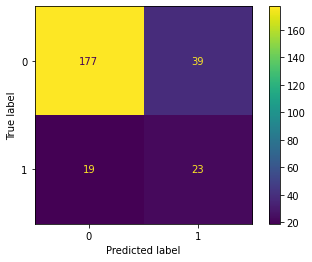

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rGRID.best_estimator_ , X_val, y_val)
plt.show()

In [32]:
21/(21+26)

0.44680851063829785

In [33]:
rGRID.best_estimator_

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=115)

In [34]:
rGRID.best_estimator_.score(X_val, y_val)

0.7751937984496124

# logistic regression

In [111]:
lgmodel = LogisticRegression(random_state=0)
lgmodel.fit(X_train_smote, y_train_smote)
sacc = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1: ',sf1.mean())
print('recall: ',sre.mean())

accuracy:  0.8887043189368772
f1:  0.8493707087503536
recall:  0.8403220035778176


In [114]:
y_predlog = lgmodel.predict(X_val)

In [115]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = lgmodel.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    accuracy = accuracy_score(y_val, predicted)
    print(threshold, classification_report(y_val, predicted))

0.0               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.16      1.00      0.28        42

    accuracy                           0.16       258
   macro avg       0.08      0.50      0.14       258
weighted avg       0.03      0.16      0.05       258

0.01               precision    recall  f1-score   support

           0       0.97      0.14      0.25       216
           1       0.18      0.98      0.31        42

    accuracy                           0.28       258
   macro avg       0.58      0.56      0.28       258
weighted avg       0.84      0.28      0.26       258

0.02               precision    recall  f1-score   support

           0       0.95      0.25      0.39       216
           1       0.19      0.93      0.32        42

    accuracy                           0.36       258
   macro avg       0.57      0.59      0.35       258
weighted avg       0.82      0.36      0.38       258

0.03 

In [116]:
loggrid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
          'C': np.logspace(-4, 4, 20),
          'solver' : ['lbfgs', 'newton-cg' , 'liblinear', 'sag', 'saga'],
          'max_iter': [100, 1000, 2500, 5000]}

In [39]:
clf = GridSearchCV(lgmodel, param_grid = loggrid, cv = 3, verbose = True, n_jobs=-1)

In [40]:
best_clf = clf.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 699 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2720 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4420 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  7.9min finished


In [41]:
best_clf.best_estimator_.score(X_val, y_val)

0.872093023255814

In [42]:
best_clf.best_params_

{'C': 545.5594781168514,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [73]:
y_pred2 = best_clf.best_estimator_.predict(X_val)

In [74]:
best_clf.score(X_val, y_val)

0.872093023255814

In [75]:
print(classification_report(y_pred2, y_val))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       235
           1       0.38      0.70      0.49        23

    accuracy                           0.87       258
   macro avg       0.67      0.79      0.71       258
weighted avg       0.92      0.87      0.89       258



In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_val))
print('acc is',metrics.accuracy_score(y_pred, y_val))
print('f1 score is',metrics.f1_score(y_pred, y_val))
print('recall score is',metrics.recall_score(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       228
           1       0.45      0.63      0.53        30

    accuracy                           0.87       258
   macro avg       0.70      0.77      0.73       258
weighted avg       0.89      0.87      0.88       258

acc is 0.8682170542635659
f1 score is 0.5277777777777778
recall score is 0.6333333333333333


# SVM

In [51]:
cls = svm.SVC(probability=True,random_state=0)

In [52]:
cls.fit(X_train_smote, y_train_smote)

SVC(probability=True, random_state=0)

In [53]:
y_pred = cls.predict(X_val)

In [54]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       228
           1       0.45      0.63      0.53        30

    accuracy                           0.87       258
   macro avg       0.70      0.77      0.73       258
weighted avg       0.89      0.87      0.88       258



In [66]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = cls.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    accuracy = accuracy_score(y_val, y_svmpred)
    print(threshold, classification_report(y_val, y_pred))

0.0               precision    recall  f1-score   support

           0       0.90      0.95      0.92       216
           1       0.63      0.45      0.53        42

    accuracy                           0.87       258
   macro avg       0.77      0.70      0.73       258
weighted avg       0.86      0.87      0.86       258

0.01               precision    recall  f1-score   support

           0       0.90      0.95      0.92       216
           1       0.63      0.45      0.53        42

    accuracy                           0.87       258
   macro avg       0.77      0.70      0.73       258
weighted avg       0.86      0.87      0.86       258

0.02               precision    recall  f1-score   support

           0       0.90      0.95      0.92       216
           1       0.63      0.45      0.53        42

    accuracy                           0.87       258
   macro avg       0.77      0.70      0.73       258
weighted avg       0.86      0.87      0.86       258

0.03 

In [55]:
svmparams = {'kernel':('linear','poly','rbf','sigmoid'),
            'C':[1,52,10],
            'degree':[3,8],
            'coef0':[0.001,10,0.5],
            'gamma':('auto','scale')}

In [56]:
gridsvm=GridSearchCV(cls, svmparams, cv=5, verbose=1)
gridsvm.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  6.9min finished


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [1, 52, 10], 'coef0': [0.001, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             verbose=1)

In [57]:
gridsvm.best_params_

{'C': 52, 'coef0': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}

In [58]:
y_svmpred = gridsvm.best_estimator_.predict(X_val)

In [59]:
print(classification_report(y_svmpred, y_val))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       233
           1       0.40      0.68      0.51        25

    accuracy                           0.87       258
   macro avg       0.68      0.79      0.72       258
weighted avg       0.91      0.87      0.89       258



In [67]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = gridsvm.best_estimator_.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    accuracy = accuracy_score(y_val, y_svmpred)
    print(threshold, classification_report(y_val, y_svmpred))

0.0               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.01               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.02               precision    recall  f1-score   support

           0       0.89      0.96      0.93       216
           1       0.68      0.40      0.51        42

    accuracy                           0.87       258
   macro avg       0.79      0.68      0.72       258
weighted avg       0.86      0.87      0.86       258

0.03 

# plotting ROC and comparing AUC

In [119]:
logistic_fpr, logistic_tpr, threshold1 = roc_curve(y_val, y_predlog)
auc_logistic = auc(logistic_fpr, logistic_tpr)

logistic_fpr2, logistic_tpr2, threshold12 = roc_curve(y_val, y_pred2)
auc_logistic2 = auc(logistic_fpr2, logistic_tpr2)


svm_fpr, svm_tpr, threshold2 = roc_curve(y_val, y_svmpred)
auc_svm = auc(svm_fpr, svm_tpr)

svm_fpr2, svm_tpr2, threshold22 = roc_curve(y_val, y_pred)
auc_svm2 = auc(svm_fpr2, svm_tpr2)

randfor_fpr, randfor_tpr, threshold3 = roc_curve(y_val, y_predrandf)
auc_randfor = auc(randfor_fpr, randfor_tpr)

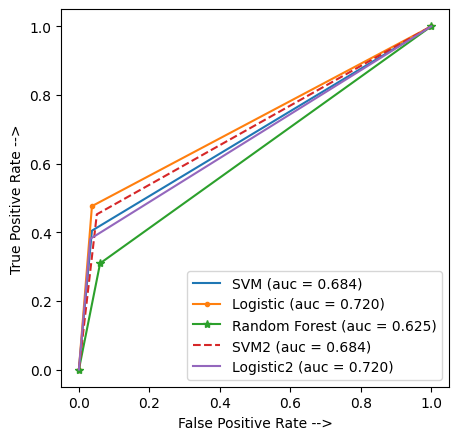

In [120]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(randfor_fpr, randfor_tpr, marker='*', label='Random Forest (auc = %0.3f)' % auc_randfor)
plt.plot(svm_fpr2, svm_tpr2, linestyle='--', label='SVM2 (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr2, logistic_tpr2, marker='', label='Logistic2 (auc = %0.3f)' % auc_logistic)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [121]:
threshold1

array([2, 1, 0])

In [65]:
optimal_idx = np.argmax(logistic_tpr - logistic_fpr)
optimal_threshold = threshold1[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 1


In [83]:
logistic_tpr

array([0.        , 0.47619048, 1.        ])

In [84]:
logistic_fpr

array([0.        , 0.03703704, 1.        ])

In [85]:
logistic_tpr - logistic_fpr

array([0.        , 0.43915344, 0.        ])

In [86]:
optimal_idx

1

In [117]:
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(lgmodel,
                                                     X_val, y_val, 
                                                     cv=5,
                                                     method = 'predict_proba').T
# Generate precision and thresholds (and recalls) using probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_probas_1)
# Populate dataframe with precision and threshold
df_recall = pd.DataFrame({"recall" : recall[:-1],
                          "threshold" : thresholds})



# Find out which threshold guarantees a recall of 0.9
threshold = df_precision[df_precision['recall'] >= 0.89]['threshold'].min()
threshold

1.2467801210527797e-05

In [118]:
df_recall

,recall,threshold
0,1.000000,0.000012
1,0.976190,0.000096
2,0.976190,0.000250
3,0.976190,0.000359
4,0.976190,0.000393
...,...,...
253,0.119048,0.841408
254,0.095238,0.845611
255,0.071429,0.915442
256,0.047619,0.943117


In [6]:
df_recall

NameError: name 'df_recall' is not defined